In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
trader_df = pd.read_csv("/content/drive/MyDrive/ds_dilliganesh/csv_files/historical_data.csv")
sentiment_df = pd.read_csv("/content/drive/MyDrive/ds_dilliganesh/csv_files/fear_greed_index.csv")

In [5]:
print("Trader Data Shape:", trader_df.shape)
print("Sentiment Data Shape:", sentiment_df.shape)

Trader Data Shape: (14149, 16)
Sentiment Data Shape: (2644, 4)


In [33]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           14149 non-null  object 
 1   Coin              14149 non-null  object 
 2   Execution Price   14149 non-null  float64
 3   Size Tokens       14149 non-null  float64
 4   Size USD          14149 non-null  float64
 5   Side              14149 non-null  object 
 6   Timestamp IST     14149 non-null  object 
 7   Start Position    14149 non-null  float64
 8   Direction         14149 non-null  object 
 9   Closed PnL        14149 non-null  float64
 10  Transaction Hash  14149 non-null  object 
 11  Order ID          14149 non-null  int64  
 12  Crossed           14149 non-null  bool   
 13  Fee               14149 non-null  float64
 14  Trade ID          14149 non-null  float64
 15  Timestamp         14149 non-null  float64
dtypes: bool(1), float64(8), int64(1), object

In [34]:
sentiment_df .info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'], dayfirst=True,format='mixed')


In [7]:
cols_to_drop = ['key_0','Timestamp IST','timestamp','date','Start Position','Direction','Coin','Account','Trade ID']
for col in cols_to_drop:
    if col in trader_df.columns:
        trader_df.drop(columns=col, inplace=True)
for col in ['Classification']:
    if col in sentiment_df.columns:
        sentiment_df.rename(columns={'Classification':'Sentiment'}, inplace=True)


In [8]:
trader_df['day'] = trader_df['time'].dt.date
sentiment_df['day'] = sentiment_df['Date'].dt.date
merged_df = pd.merge(trader_df, sentiment_df, on='day', how='left')

print("Merged Data Shape:", merged_df.shape)

Merged Data Shape: (14149, 17)


In [38]:
merged_df.head()

,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Timestamp,time,day,timestamp,value,classification,date,Date
0,7.9769,986.87,7872.16,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
1,7.9800,16.00,127.68,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
2,7.9855,144.09,1150.63,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
3,7.9874,142.98,1142.04,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
4,7.9894,8.73,69.75,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02


In [9]:
cols_to_drop = []
if 'Date' in merged_df.columns:
    cols_to_drop.append('Date')
merged_df.drop(columns=cols_to_drop, inplace=True)


In [40]:
merged_df.head()

,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Timestamp,time,day,timestamp,value,classification,date
0,7.9769,986.87,7872.16,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,7.9800,16.00,127.68,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,7.9855,144.09,1150.63,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,7.9874,142.98,1142.04,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,7.9894,8.73,69.75,BUY,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [10]:
if 'Side' in merged_df.columns:
    merged_df['Side'] = merged_df['Side'].map({'BUY':1,'SELL':0})

if 'Crossed' in merged_df.columns:
    merged_df['Crossed'] = merged_df['Crossed'].astype(int)


sentiment_map = {
    'Extreme Fear':0,
    'Fear':1,
    'Neutral':2,
    'Greed':3,
    'Extreme Greed':4
}
merged_df['Sentiment_Level'] = merged_df['classification'].map(sentiment_map)

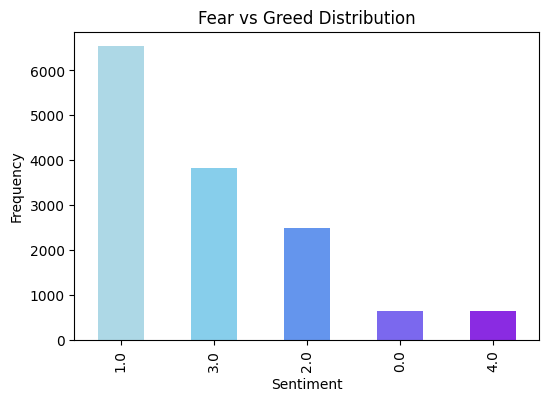

In [46]:
# 1. Market Sentiment Distribution
plt.figure(figsize=(6,4))
merged_df['Sentiment_Level'].value_counts().plot(kind='bar', color=['#ADD8E6', '#87CEEB', '#6495ED', '#7B68EE', '#8A2BE2'])
plt.title("Fear vs Greed Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/sentiment_distribution.png")
plt.show()

/tmp/ipython-input-3827575336.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment_Label', y='Closed PnL', data=merged_df, palette="Set2")


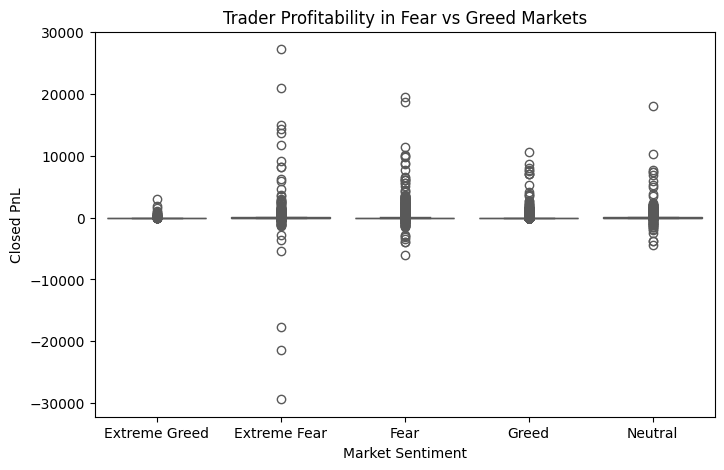

In [52]:
sentiment_labels = {0:'Extreme Fear', 1:'Fear', 2:'Neutral', 3:'Greed', 4:'Extreme Greed'}
merged_df['Sentiment_Label'] = merged_df['Sentiment_Level'].map(sentiment_labels)

# Plot Profitability vs Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='Sentiment_Label', y='Closed PnL', data=merged_df, palette="Set2")
plt.title("Trader Profitability in Fear vs Greed Markets")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/profitability_sentiment.png")
plt.show()


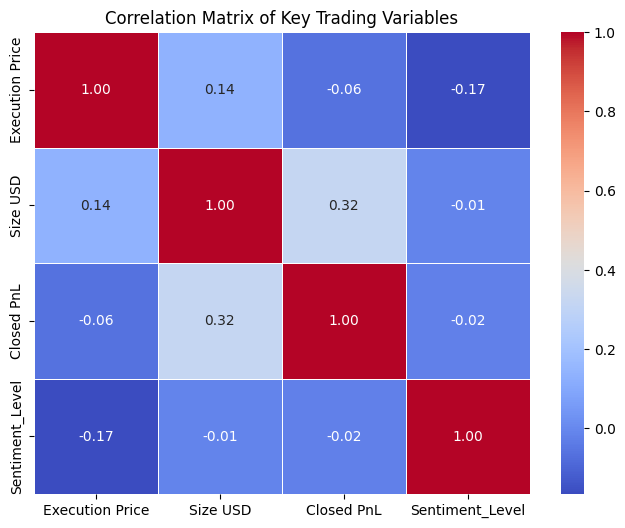

In [57]:
# 4. Correlation Heatmap
cols = ['Execution Price', 'Size USD', 'Closed PnL','Sentiment_Level']
cols = [col for col in cols if col in merged_df.columns]

plt.figure(figsize=(8,6))
sns.heatmap(
    merged_df[cols].corr(),
    annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5
)
plt.title("Correlation Matrix of Key Trading Variables")
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/correlation_heatmap.png")
plt.show()


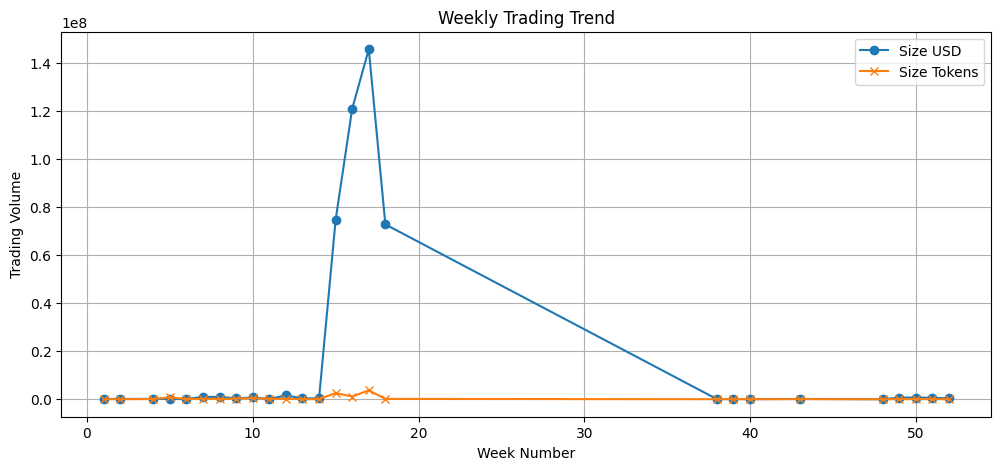

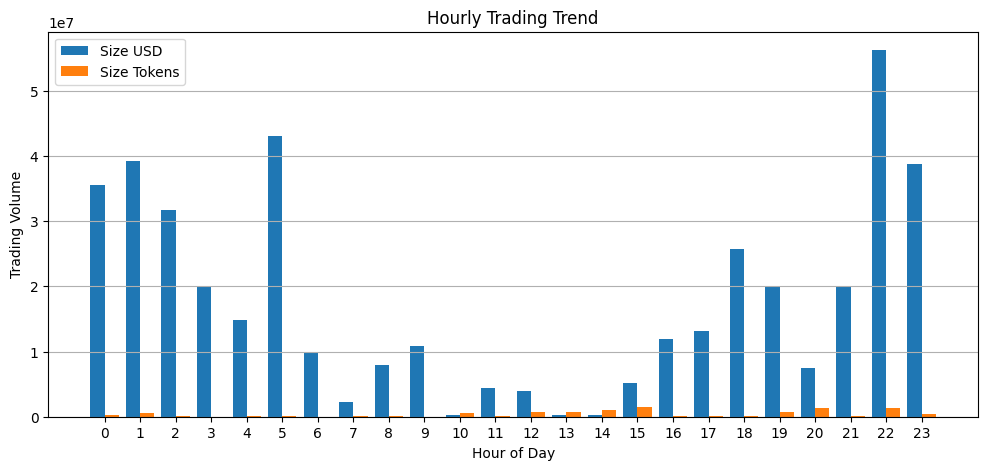

In [59]:
 # Weekly Trend Analysis

merged_df['week'] = merged_df['time'].dt.isocalendar().week
weekly_trend = merged_df.groupby('week').agg({
    'Size USD':'sum',
    'Size Tokens':'sum'
}).reset_index()

plt.figure(figsize=(12,5))
plt.plot(weekly_trend['week'], weekly_trend['Size USD'], marker='o', label='Size USD')
plt.plot(weekly_trend['week'], weekly_trend['Size Tokens'], marker='x', label='Size Tokens')
plt.title("Weekly Trading Trend")
plt.xlabel("Week Number")
plt.ylabel("Trading Volume")
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/Weekly_Trend_Analysis.png")
plt.show()

# Hourly Trend Analysis

merged_df['hour'] = merged_df['time'].dt.hour
hourly_trend = merged_df.groupby('hour').agg({
    'Size USD':'sum',
    'Size Tokens':'sum'
}).reset_index()

plt.figure(figsize=(12,5))
plt.bar(hourly_trend['hour']-0.2, hourly_trend['Size USD'], width=0.4, label='Size USD')
plt.bar(hourly_trend['hour']+0.2, hourly_trend['Size Tokens'], width=0.4, label='Size Tokens')
plt.title("Hourly Trading Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Trading Volume")
plt.xticks(range(0,24))
plt.legend()
plt.grid(axis='y')
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/Hourly_Trend_Analysis.png")
plt.show()

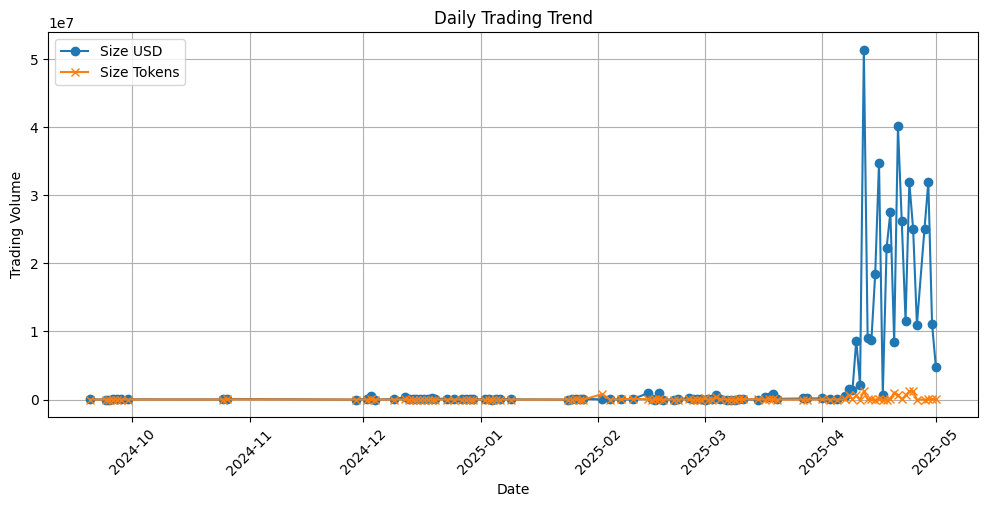

In [60]:
# Daily Trend Analysis

daily_trend = merged_df.groupby(merged_df['time'].dt.date).agg({
    'Size USD':'sum',
    'Size Tokens':'sum'
}).reset_index()

plt.figure(figsize=(12,5))
plt.plot(daily_trend['time'], daily_trend['Size USD'], marker='o', label='Size USD')
plt.plot(daily_trend['time'], daily_trend['Size Tokens'], marker='x', label='Size Tokens')
plt.title("Daily Trading Trend")
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/Daily_Trend_Analysis.png")
plt.show()

In [62]:
# Overall Volatility

execution_price_vol = merged_df['Execution Price'].std()
size_usd_vol = merged_df['Size USD'].std()
size_tokens_vol = merged_df['Size Tokens'].std()

print("Overall Volatility:")
print(f"Execution Price Volatility: {execution_price_vol:.4f}")
print(f"Size USD Volatility: {size_usd_vol:.2f}")
print(f"Size Tokens Volatility: {size_tokens_vol:.2f}")

Overall Volatility:
Execution Price Volatility: 42030.9956
Size USD Volatility: 122972.54
Size Tokens Volatility: 9941.84


In [63]:
merged_df = merged_df.sort_values('time')


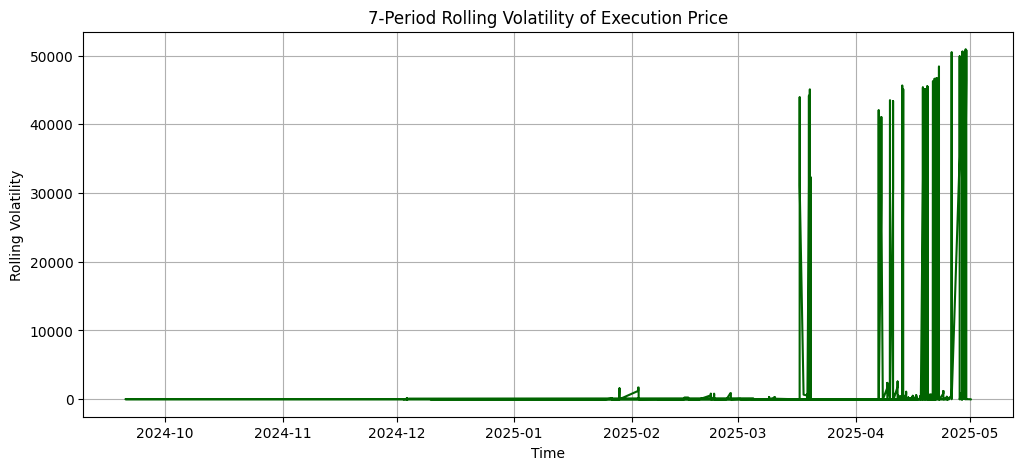

In [48]:
# 7-day rolling volatility
merged_df['Rolling_Volatility'] = merged_df['Execution Price'].rolling(window=7).std()

plt.figure(figsize=(12,5))
plt.plot(merged_df['time'], merged_df['Rolling_Volatility'], color='darkgreen')
plt.title("7-Period Rolling Volatility of Execution Price")
plt.xlabel("Time")
plt.ylabel("Rolling Volatility")
plt.grid(True)
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/Rolling_volatility.png")
plt.show()

In [67]:
merged_df['ExecutionPrice_RollingAvg'] = merged_df['Execution Price'].rolling(window=7).mean()
merged_df['SizeUSD_RollingAvg'] = merged_df['Size USD'].rolling(window=7).mean()

merged_df['ExecutionPrice_Forecast'] = merged_df['ExecutionPrice_RollingAvg'] * (1 + 0.02*(merged_df['value']-50)/10)
merged_df['SizeUSD_Forecast'] = merged_df['SizeUSD_RollingAvg'] * (1 + 0.02*(merged_df['value']-50)/10)


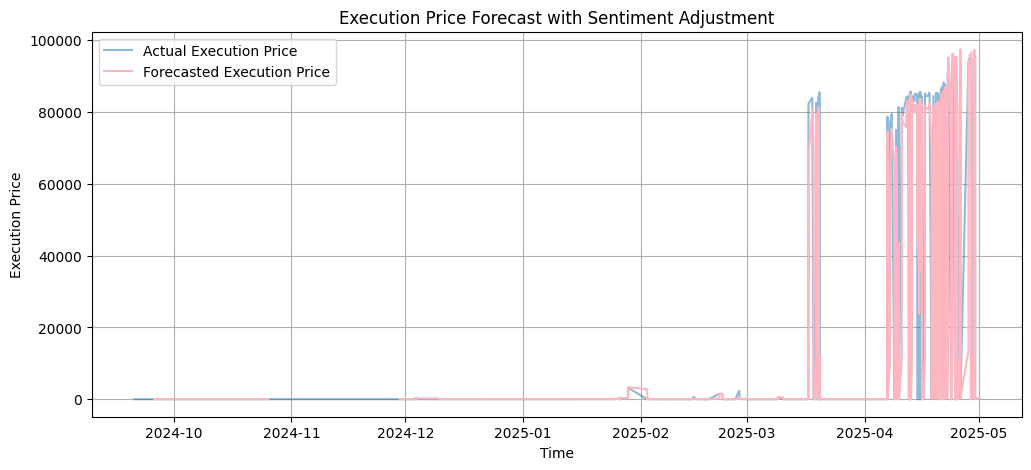

In [72]:
# Forecast Execution Price using Sentiment

plt.figure(figsize=(12,5))
plt.plot(merged_df['time'], merged_df['Execution Price'], label='Actual Execution Price', alpha=0.5)
plt.plot(merged_df['time'], merged_df['ExecutionPrice_Forecast'], label='Forecasted Execution Price', color='lightpink')
plt.title("Execution Price Forecast with Sentiment Adjustment")
plt.xlabel("Time")
plt.ylabel("Execution Price")
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/Forecast_Execution_Price_using_Sentiment.png")
plt.show()

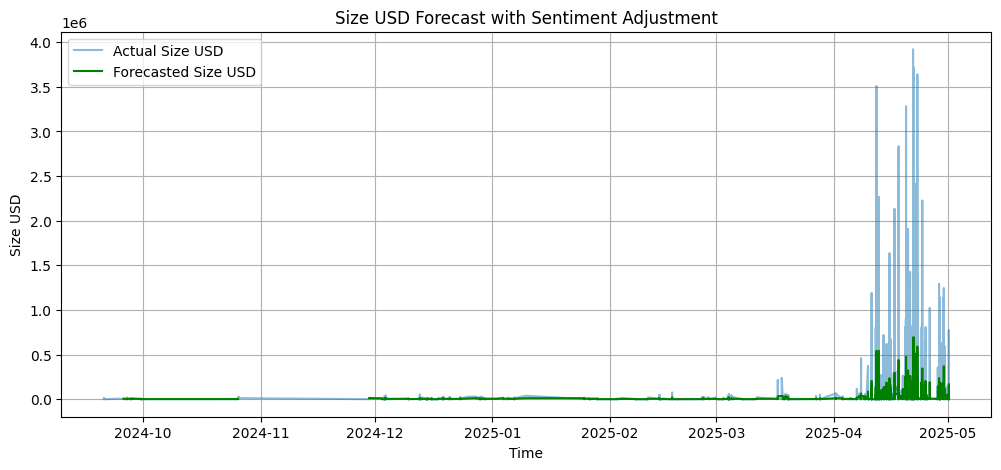

In [70]:
# Forecast Size USD using Sentiment

plt.figure(figsize=(12,5))
plt.plot(merged_df['time'], merged_df['Size USD'], label='Actual Size USD', alpha=0.5)
plt.plot(merged_df['time'], merged_df['SizeUSD_Forecast'], label='Forecasted Size USD', color='green')
plt.title("Size USD Forecast with Sentiment Adjustment")
plt.xlabel("Time")
plt.ylabel("Size USD")
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/Forecast_Execution_Price_using_Sentiment.png")
plt.show()

In [76]:
print(merged_df.columns)

Index(['Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Timestamp', 'time',
       'day', 'timestamp', 'value', 'classification', 'date',
       'Sentiment_Level', 'Sentiment_Label', 'hour', 'week',
       'Rolling_Volatility', 'ExecutionPrice_RollingAvg', 'SizeUSD_RollingAvg',
       'ExecutionPrice_Forecast', 'SizeUSD_Forecast'],
      dtype='object')


In [77]:
# risk reward ratio
risk_reward = merged_df.groupby('Sentiment_Level')['Closed PnL']\
    .apply(lambda x: x[x>0].mean() / abs(x[x<0].mean()))
print("\nRisk-Reward Ratio:\n", risk_reward)


Risk-Reward Ratio:
 Sentiment_Level
0.0     1.580394
1.0     1.246407
2.0     0.429906
3.0    46.518418
4.0          NaN
Name: Closed PnL, dtype: float64


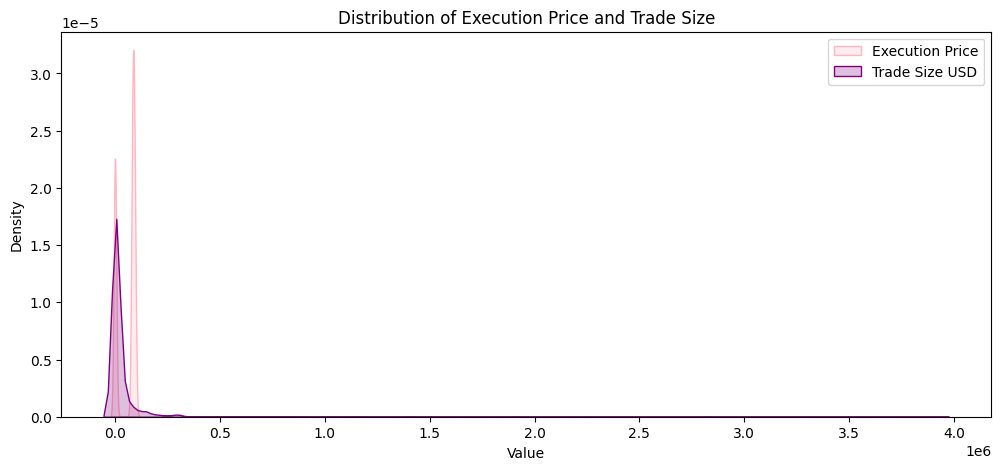

In [44]:
#  Distribution of Execution Price and Trade Size
plt.figure(figsize=(12,5))
sns.kdeplot(df['Execution Price'], fill=True, color='lightpink', label='Execution Price')
sns.kdeplot(df['Size USD'], fill=True, color='purple', label='Trade Size USD')
plt.title("Distribution of Execution Price and Trade Size")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/Price_tradeSize _densityDistribution.png")
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       192
           1       0.97      0.98      0.98      2003
           2       0.97      0.96      0.96       739
           3       0.96      0.97      0.97      1111
           4       0.92      0.88      0.90       198
           5       0.00      0.00      0.00         2

    accuracy                           0.96      4245
   macro avg       0.78      0.77      0.78      4245
weighted avg       0.96      0.96      0.96      4245


Confusion Matrix:
 [[ 166   23    0    3    0    0]
 [  12 1970    6    6    9    0]
 [   3   14  706   16    0    0]
 [   4   14   13 1073    7    0]
 [   3    5    2   14  174    0]
 [   2    0    0    0    0    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipython-input-3239535760.py:27: FutureWarnin

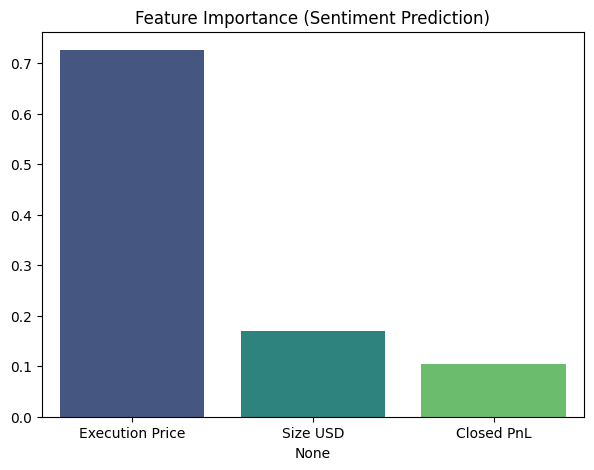

In [31]:
#  Predictive Modeling

le = LabelEncoder()
merged_df['Sentiment_encoded'] = le.fit_transform(merged_df['Sentiment_Level'])


X = merged_df[['Execution Price','Size USD','Closed PnL']]
y = merged_df['Sentiment_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(7,5))
sns.barplot(y=importances, x=features, palette="viridis")
plt.title("Feature Importance (Sentiment Prediction)")
plt.show()

# Save Processed Data
merged_df.to_csv("/content/drive/MyDrive/ds_dilliganesh/csv_files/merged_dataset.csv", index=False)



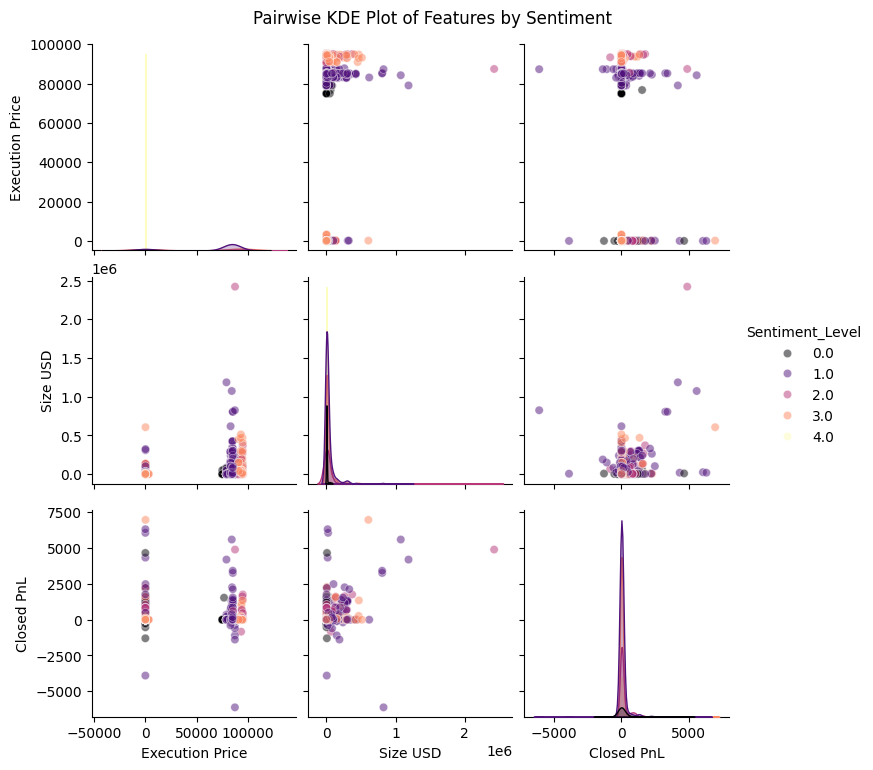

In [43]:
# Pairplot with KDE on diagonals
features = ['Execution Price', 'Size USD', 'Closed PnL']
sample_df = merged_df.sample(2000, random_state=42) #to avoid overcrowding
sns.pairplot(
    sample_df,
    vars=features,
    hue='Sentiment_Level',
    palette='magma',
    diag_kind='kde',
    plot_kws={'alpha':0.5}
)
plt.suptitle("Pairwise KDE Plot of Features by Sentiment", y=1.02)
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/Feature_interaction_using_pairplot.png")
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
df= merged_df

le_side = LabelEncoder()
df['Side_enc'] = le_side.fit_transform(df['Side'])

le_crossed = LabelEncoder()
df['Crossed_enc'] = le_crossed.fit_transform(df['Crossed'].astype(str))

sentiment_map = {
    'Extreme Fear':0, 'Fear':1, 'Neutral':2, 'Greed':3, 'Extreme Greed':4
}
if 'classification' in df.columns:
    df['Sentiment_Level'] = df['classification'].map(sentiment_map)


features = ['Side_enc','Crossed_enc','Sentiment_Level','Size USD','Size Tokens']
target = 'Execution Price'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")




Mean Squared Error: 6765368.6348
R² Score: 0.9962


In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Execution Price'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -6.101292990426401
p-value: 9.821206403799357e-08


In [28]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Execution Price'].dropna(), order=(5,1,2))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:        Execution Price   No. Observations:                14149
Model:                 ARIMA(5, 1, 2)   Log Likelihood             -138815.644
Date:                Thu, 02 Oct 2025   AIC                         277647.289
Time:                        14:01:30   BIC                         277707.747
Sample:                             0   HQIC                        277667.406
                              - 14149                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0053      7.417     -0.001      0.999     -14.543      14.532
ar.L2         -0.6167      6.892     -0.089      0.929     -14.125      12.891
ar.L3         -0.0165      1.685     -0.010      0.9

/tmp/ipython-input-1030846495.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(df['time'].iloc[-1], periods=500, freq='H'), forecast, label='Forecast', color='blue')


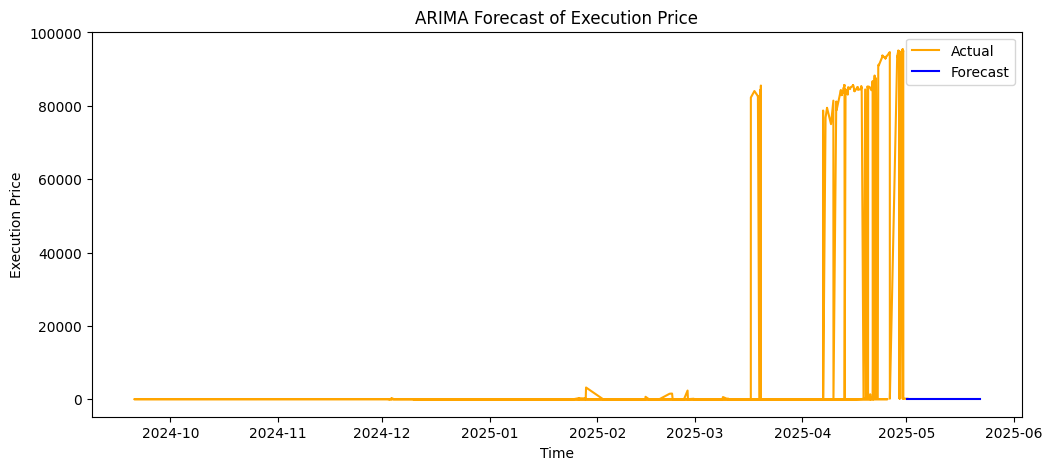

In [42]:
forecast = model_fit.forecast(steps=500)
plt.figure(figsize=(12,5))
plt.plot(df['time'], df['Execution Price'], label='Actual', color='orange')
plt.plot(pd.date_range(df['time'].iloc[-1], periods=500, freq='H'), forecast, label='Forecast', color='blue')
plt.title("ARIMA Forecast of Execution Price")
plt.xlabel("Time")
plt.ylabel("Execution Price")
plt.legend()
plt.savefig("/content/drive/MyDrive/ds_dilliganesh/outputs/Forecast_Execution_Price_using_ARIMA.png")
plt.show()
